## https://support.pix4d.com/hc/en-us/articles/202559239-How-Pix4Dmapper-calculates-the-Volume#gsctab=0

In [1]:
from copy import deepcopy
import open3d as o3d
import numpy as np


from sklearn.cluster import DBSCAN


bunny   = o3d.data.BunnyMesh()
gt_mesh = o3d.io.read_triangle_mesh(bunny.path)
gt_mesh.compute_vertex_normals()
pcd     = gt_mesh.sample_points_poisson_disk(5000)

# Invalidate existing normals.
pcd.normals = o3d.utility.Vector3dVector(np.zeros((1, 3)))
pcd.estimate_normals()


xyz_normals = np.asarray(pcd.normals)
db = DBSCAN(eps=0.09, min_samples=90).fit(xyz_normals)

segments     = []
list_points  = None
whole_points = deepcopy(pcd)
all_points   = np.array(whole_points.points)

whole_points.points = o3d.utility.Vector3dVector(all_points)
whole_points.paint_uniform_color([np.random.rand(), np.random.rand(), np.random.rand()])


for label in set(db.labels_):
    mask = db.labels_ == label
    seg_pcd = deepcopy(pcd)
    points = np.array(seg_pcd.points)[mask]
    if list_points is None:
        list_points = points
    else:
        list_points = np.concatenate((list_points, points), axis=0) 
    seg_pcd.points = o3d.utility.Vector3dVector(points)
    seg_pcd.paint_uniform_color([np.random.rand(), np.random.rand(), np.random.rand()])
    segments.append(seg_pcd)

threshold  = 0.008
mask_lower = list_points[:,1]<list_points[:,1].min()+threshold
o3d.visualization.draw_geometries(segments, point_show_normal=True)

base = list_points[mask_lower]
rest = list_points[np.logical_not(mask_lower)]

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
import matplotlib.pyplot as plt

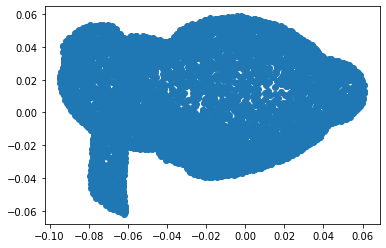

In [3]:
plt.scatter(list_points[:,0],list_points[:,2])


In [4]:
#for x in enumerate(list_points[:,0])

#list_points[:,0],list_points[:,2])

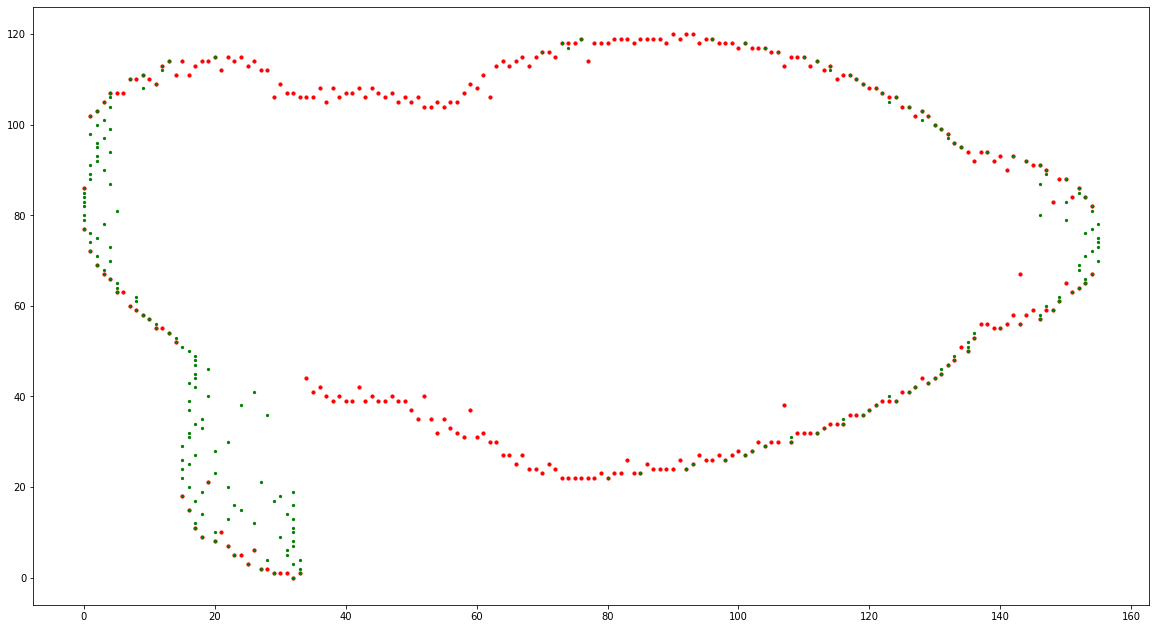

In [4]:
rescaled  = list_points.copy()

rescaled[:,0] += abs(list_points[:,0].min())
rescaled[:,1] += abs(list_points[:,1].min())
rescaled[:,2] += abs(list_points[:,2].min())

rescaled*=1000
rescaled = rescaled.astype(int)

x0,xf = rescaled[:,0].min(),rescaled[:,0].max()
y0,yf = rescaled[:,2].min(),rescaled[:,2].max()


#plt.scatter(rescaled[:,0],rescaled[:,2])

plt.figure(figsize = (20,11))

x_boundaries = []

for x_range in range(0,xf):
    y_mask = rescaled[:,0] == x_range
    lower_bound, upper_bound = rescaled[y_mask,2].max(),rescaled[y_mask,2].min()  
    
    x_boundaries.append((x_range,lower_bound))
    x_boundaries.append((x_range,upper_bound))

x_boundaries = np.array(x_boundaries)

plt.scatter((x_boundaries[:,0]),(x_boundaries[:,1]),c='r',s = 10)
    

y_booundaries = []
for y_range in range(0,yf):
    x_mask = rescaled[:,2] == y_range
    lower_bound, upper_bound = rescaled[x_mask,0].max(),rescaled[x_mask,0].min()  
    y_booundaries.append((lower_bound,y_range))
    y_booundaries.append((upper_bound,y_range))
    
y_booundaries = np.array(y_booundaries)

plt.scatter(y_booundaries[:,0],y_booundaries[:,1],c='green',s=5)
    

    

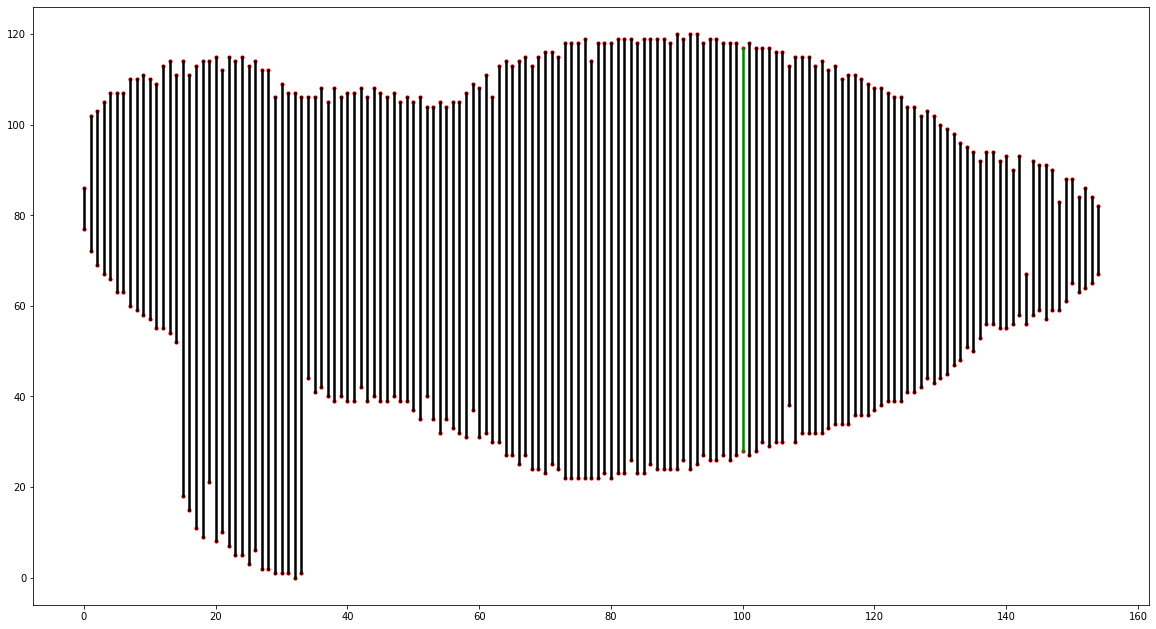

In [5]:
rescaled  = list_points.copy()

rescaled[:,0] += abs(list_points[:,0].min())
rescaled[:,1] += abs(list_points[:,1].min())
rescaled[:,2] += abs(list_points[:,2].min())

rescaled*=1000
rescaled = rescaled.astype(int)

x0,xf = rescaled[:,0].min(),rescaled[:,0].max()
y0,yf = rescaled[:,2].min(),rescaled[:,2].max()


plt.figure(figsize = (20,11))

x_boundaries = []


for x_range in range(0,xf):
    y_mask = rescaled[:,0] == x_range
    lower_bound, upper_bound = rescaled[y_mask,2].max(),rescaled[y_mask,2].min()  
    
    x_boundaries.append((x_range,lower_bound))
    x_boundaries.append((x_range,upper_bound))
    
    if x_range == 100:
        plt.plot((x_range,x_range),(lower_bound,upper_bound),c= 'green',linewidth=2.5)
    else:
        plt.plot((x_range,x_range),(lower_bound,upper_bound),c= 'black',linewidth=2.5)
x_boundaries = np.array(x_boundaries)

plt.scatter((x_boundaries[:,0]),(x_boundaries[:,1]),c='r',s = 10)

In [7]:
x_boundaries[:2,1][0]

87

In [8]:
x = np.array([1,2,2,2,1,2,1])
x[x==2]

array([2, 2, 2, 2])

5.5265


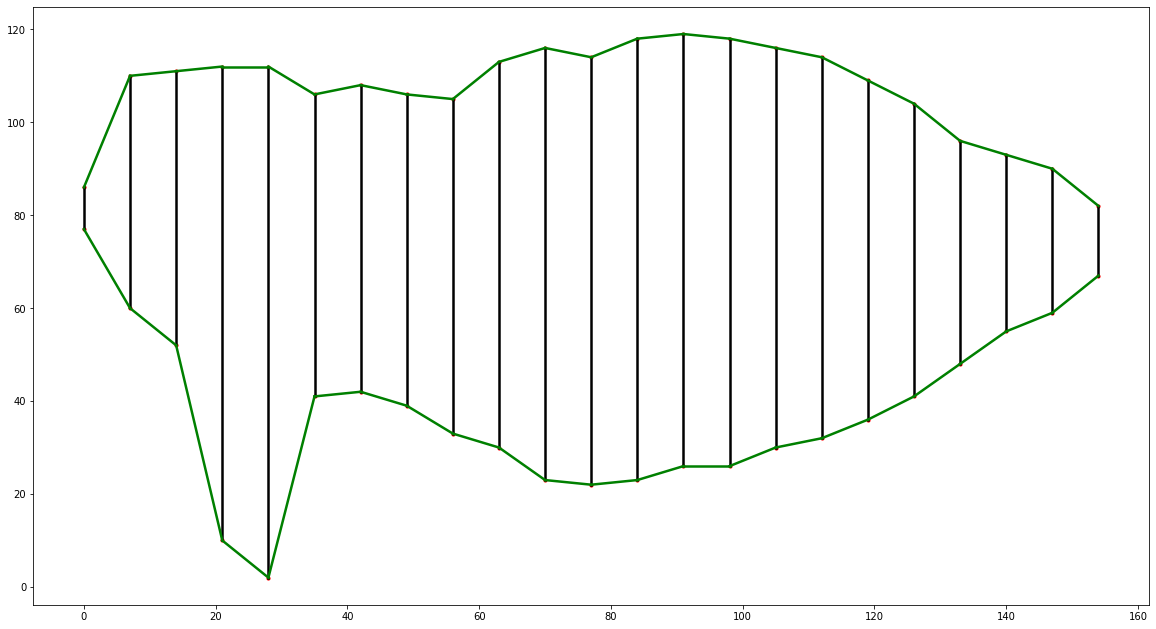

In [6]:
rescaled  = list_points.copy()

rescaled[:,0] += abs(list_points[:,0].min())
rescaled[:,1] += abs(list_points[:,1].min())
rescaled[:,2] += abs(list_points[:,2].min())

rescaled*=1000
rescaled = rescaled.astype(int)

x0,xf = rescaled[:,0].min(),rescaled[:,0].max()
y0,yf = rescaled[:,2].min(),rescaled[:,2].max()


plt.figure(figsize = (20,11))

x_boundaries = []

h = 7

for x_range in range(0,xf,h):
    y_mask = rescaled[:,0] == x_range
    lower_bound, upper_bound = rescaled[y_mask,2].max(),rescaled[y_mask,2].min()  
    
    x_boundaries.append((x_range,lower_bound))
    x_boundaries.append((x_range,upper_bound))
    
    if x_range == 100:
        plt.plot((x_range,x_range),(lower_bound,upper_bound),c= 'green',linewidth=2.5)
    else:
        plt.plot((x_range,x_range),(lower_bound,upper_bound),c= 'black',linewidth=2.5)
x_boundaries = np.array(x_boundaries)

plt.scatter((x_boundaries[:,0]),(x_boundaries[:,1]),c='r',s = 10)

A = 0
for i in range(0,len(x_boundaries)-3,2):
    x_range_1,lower_bound_1 = x_boundaries[i]
    x_range_1,upper_bound_1 = x_boundaries[i+1]
    x_range_2,lower_bound_2 = x_boundaries[i+2]
    x_range_2,upper_bound_2 = x_boundaries[i+3]
    
    b = lower_bound_1-upper_bound_1
    B = upper_bound_1-upper_bound_2
    
    A+=(b+B)*h/2
    
    
    plt.plot((x_range_1,x_range_2),(lower_bound_1,lower_bound_2),c= 'green',linewidth=2.5)
    plt.plot((x_range_1,x_range_2),(upper_bound_1,upper_bound_2),c= 'green',linewidth=2.5)
    
print(A/1000)

In [10]:
rescaled.shape

(5000, 3)

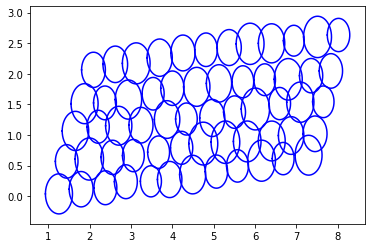

In [7]:
def plot_circle(x,y,r,c='b'):
    x_c = r*np.cos( np.linspace(-np.pi,np.pi,1000))+x
    y_c = r*np.sin( np.linspace(-np.pi,np.pi,1000))+y
    plt.plot(x_c,y_c,c=c)
    return x_c,y_c
    
X = np.linspace(1,7,12)
Y = np.linspace(0,2,5)
R = np.random.rand(100*30)*0.25

k=0.2

lista_x_cascas = []
lista_y_cascas = []
for y in Y:
    for x in X:
        r = 0.25 + np.random.rand()*0.1
        x+=np.random.rand()*0.1+k
        y+=np.random.rand()*0.1
        x_casca,y_casca = plot_circle(x,y,r,c='b')
        lista_x_cascas.append(x_casca)
        lista_y_cascas.append(y_casca)
    k+=0.2




        
        

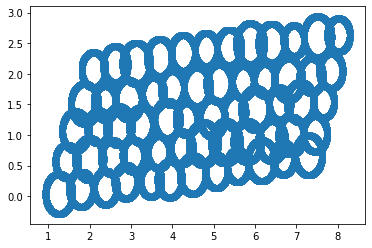

In [8]:
x = np.array(lista_x_cascas).reshape(-1,1)
y = np.array(lista_y_cascas).reshape(-1,1)

x_y = np.concatenate([x,y],axis=1)
x_y.shape
plt.scatter(x_y[:,0],x_y[:,1])

Area estereo 16.641653883283876 161195.0


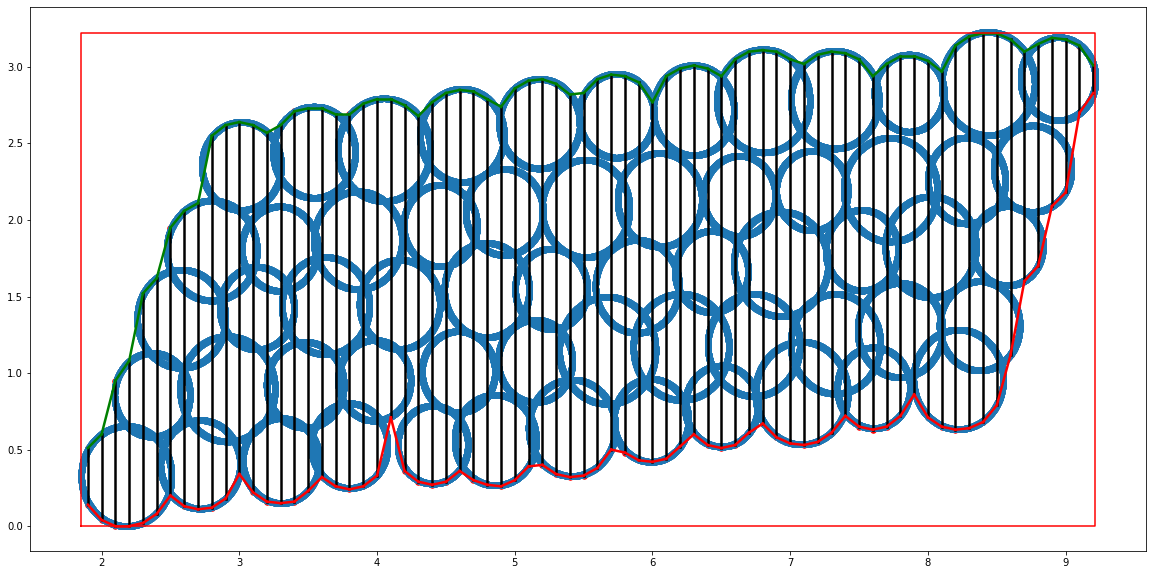

In [18]:
def rescale(array_2d):
    array_2d[:,0] += abs(array_2d[:,0].min())
    array_2d[:,1] += abs(array_2d[:,1].min())
    return array_2d


def quantize(array_2d,quantize_scale):
    array_2d*= quantize_scale
    array_2d = array_2d.astype(int)
    return array_2d

def get_min_max(array_2d):
    x0,xf = array_2d[:,0].min(),array_2d[:,0].max()
    y0,yf = array_2d[:,1].min(),array_2d[:,1].max()
    return x0,xf,y0,yf

def get_boundaries(array_2d,h):
    
    x0, xf, y0, yf = get_min_max(array_2d)
    x_boundaries   = []
    
    for x_range in range(0,int(xf),h):
        y_mask = array_2d[:,0] == x_range
        if y_mask.sum()==0:continue
        lower_bound, upper_bound = array_2d[y_mask,1].max(),array_2d[y_mask,1].min()  

        x_boundaries.append((x_range,lower_bound))
        x_boundaries.append((x_range,upper_bound))
        
    x_boundaries = np.array(x_boundaries)
    
    return x_boundaries

def plot_trapeze(array_2d,h,quantize_scale):
    x0, xf, y0, yf = get_min_max(array_2d)
    
    for x_range in range(0,int(xf),h):
        y_mask = array_2d[:,0] == x_range
        if y_mask.sum() == 0: continue
        lower_bound, upper_bound = array_2d[y_mask,1].max(),array_2d[y_mask,1].min()  

        plt.plot((x_range/quantize_scale,x_range/quantize_scale),
                 (lower_bound/quantize_scale,upper_bound/quantize_scale),
                 c= 'black',linewidth=2.5)

def get_trapeze_areas(x_boundaries):
    A = 0
    for i in range(0,len(x_boundaries)-2,2):
        x_range_1, lower_bound_1 = x_boundaries[i]
        x_range_1, upper_bound_1 = x_boundaries[i+1]
        x_range_2, lower_bound_2 = x_boundaries[i+2]
        x_range_2, upper_bound_2 = x_boundaries[i+3]
        
        b = abs(lower_bound_1-upper_bound_1)
        B = abs(lower_bound_2-upper_bound_2)
        #print(((b+B)*abs(x_range_1-x_range_2))/2,b,B,abs(x_range_1-x_range_2))
        A+=((b+B)*abs(x_range_1-x_range_2))/2
        
    return A
        
    
def plot_boundaries(x_boundaries,quantize_scale):
    for i in range(0,len(x_boundaries)-2,2):
        x_range_1, lower_bound_1 = x_boundaries[i]
        x_range_1, upper_bound_1 = x_boundaries[i+1]
        x_range_2, lower_bound_2 = x_boundaries[i+2]
        x_range_2, upper_bound_2 = x_boundaries[i+3]

        plt.plot((x_range_1/quantize_scale,x_range_2/quantize_scale),
                 (lower_bound_1/quantize_scale,lower_bound_2/quantize_scale)
                 ,c= 'green',linewidth=2.5)
        
        plt.plot((x_range_1/quantize_scale,x_range_2/quantize_scale),
                 (upper_bound_1/quantize_scale,upper_bound_2/quantize_scale),
                 c= 'red',linewidth=2.5)


def plot_raw(x_y):
    raw = x_y.copy()
    #raw = rescale(raw)
    raw[:,0] += abs(raw[:,0].min())
    raw[:,1] += abs(raw[:,1].min())
    plt.scatter(raw[:,0],raw[:,1])

def plot_retangle(array_2d,quantize_scale):
    x0  = array_2d[:,0].min()/quantize_scale
    y0  = array_2d[:,1].min()/quantize_scale
    xf  = array_2d[:,0].max()/quantize_scale
    yf  = array_2d[:,1].max()/quantize_scale

    plt.plot([x0,x0,xf,xf,x0],[y0,yf,yf,y0,y0],c='red')

def get_retangle_area(x_y):
    raw = x_y.copy()
    delta_y = x_y[:,0].max() - x_y[:,0].min()
    delta_x = x_y[:,1].max() - x_y[:,1].min() 
    
    x0  = raw[:,0].min()#/quantize_scale
    y0  = raw[:,1].min()#/quantize_scale
    xf  = raw[:,0].max()#/quantize_scale
    yf  = raw[:,1].max()#/quantize_scale

    plt.plot([x0,x0,xf,xf,x0],[y0,yf,yf,y0,y0],c='red')
    print("Area retangulo",delta_y*delta_x)


    
array_2d       = x_y.copy()
quantize_scale = 100
h              = 10
array_2d       = rescale(array_2d)
array_2d       = quantize(array_2d,quantize_scale)
x_boundaries   = get_boundaries(array_2d,h)
area           = get_trapeze_areas(x_boundaries)

    
plt.figure(figsize = (20,10))
plot_trapeze(array_2d,h,quantize_scale)
plt.scatter((x_boundaries[:,0]/quantize_scale),(x_boundaries[:,1]/quantize_scale),c='r',s = 30)
plot_boundaries(x_boundaries,quantize_scale)
plot_raw(x_y)

plot_retangle(array_2d,quantize_scale)
#plot_retangle(array_2d)
#get_retangle_area(x_y)
A = get_trapeze_areas(x_y)
print("Area estereo",A*quantize_scale,area )


In [14]:
def test(quantize_scale,h):
    array_2d       = x_y.copy()
    #quantize_scale = 100
    #h              = 4
    array_2d       = rescale(array_2d)
    array_2d       = quantize(array_2d,quantize_scale)
    x_boundaries   = get_boundaries(array_2d,h)
    area           = get_trapeze_areas(x_boundaries)


    plt.figure(figsize = (20,11))
    plot_trapeze(array_2d,h,quantize_scale)
    plt.scatter((x_boundaries[:,0]/quantize_scale),(x_boundaries[:,1]/quantize_scale),c='r',s = 30)
    plot_boundaries(x_boundaries,quantize_scale)
    plot_raw(x_y)

    #plot_retangle(array_2d)
    get_retangle_area(x_y)
    A = get_trapeze_areas(x_y)
    print("Area estereo",A*quantize_scale)

In [37]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import Layout

In [41]:
interact(test, 
        quantize_scale = widgets.IntSlider(min=10, max=400, step=10, value=0,layout=Layout(width='700px')),
        h = widgets.IntSlider(min=2, max=40, step=1, value=0,layout=Layout(width='700px')));

interactive(children=(IntSlider(value=10, description='quantize_scale', layout=Layout(width='700px'), max=400,…

In [204]:
100*(15.036-15.15)/15.15

-0.7524752475247575

In [162]:
i=0
x_range_1,lower_bound_1 = x_boundaries[i]/100
x_range_1,upper_bound_1 = x_boundaries[i+1]/100
x_range_2,lower_bound_2 = x_boundaries[i+2]/100
x_range_2,upper_bound_2 = x_boundaries[i+3]/100

b = abs(lower_bound_1-upper_bound_1)
B = abs(upper_bound_2-upper_bound_2)

H = x_range_2-x_range_1

A=0
A+=(b+B)*H/2
A,b,B,h

#b,B,H

lower_bound_1,upper_bound_1,
upper_bound_1,upper_bound_2#,x_range_1,x_range_2


(0.24, 0.06)

17.658304662733364

In [100]:
i=14
x_boundaries[i],x_boundaries[i+1],x_boundaries[i+2],x_boundaries[i+3],b,B

(array([420, 270]),
 array([420,  15]),
 array([450, 275]),
 array([450,   9]),
 205,
 7)

(199, 24, 24, 6, 140, 160)

In [80]:
(x_range_2-x_range_1)

3

In [37]:
#rescaled[y_mask,1].max()
y_mask.sum()

0

(array([7.81740176, 7.81950226, 7.82576929, 7.83609993, 7.85032456,
        7.86820961, 7.88946141, 7.91373099, 7.94061987, 7.96968652,
        8.00045367, 8.03241612, 8.06504905, 8.09781663, 8.13018082,
        8.16161019, 8.19158869, 8.21962405, 8.24525595, 8.2680635 ,
        8.28767221, 8.3037601 , 8.31606302, 8.32437894, 8.32857131,
        8.32857131, 8.32437894, 8.31606302, 8.3037601 , 8.28767221,
        8.2680635 , 8.24525595, 8.21962405, 8.19158869, 8.16161019,
        8.13018082, 8.09781663, 8.06504905, 8.03241612, 8.00045367,
        7.96968652, 7.94061987, 7.91373099, 7.88946141, 7.86820961,
        7.85032456, 7.83609993, 7.82576929, 7.81950226, 7.81740176]),
 array([2.44404285, 2.41132578, 2.37914593, 2.34803168, 2.31849394,
        2.2910177 , 2.26605413, 2.24401313, 2.22525662, 2.21009257,
        2.19876997, 2.19147475, 2.18832669, 2.18937748, 2.19460987,
        2.20393795, 2.21720854, 2.23420374, 2.25464449, 2.27819516,
        2.30446905, 2.33303473, 2.36342317, 2.

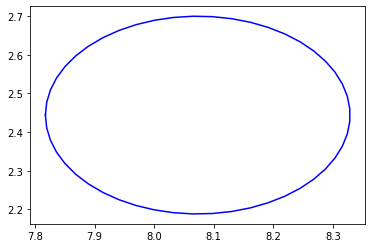

In [134]:
plot_circle(x,y,r,c='b')

In [48]:
A/1000

5.639

In [ ]:
for in x_boundaries:
    if x_range == 100:
        plt.plot((x_range,x_range),(lower_bound,upper_bound),c= 'green',linewidth=2.5)
    else:
        plt.plot((x_range,x_range),(lower_bound,upper_bound),c= 'black',linewidth=2.5)
    x_boundaries = np.array(x_boundaries)

    plt.scatter((x_boundaries[:,0]),(x_boundaries[:,1]),c='r',s = 10)

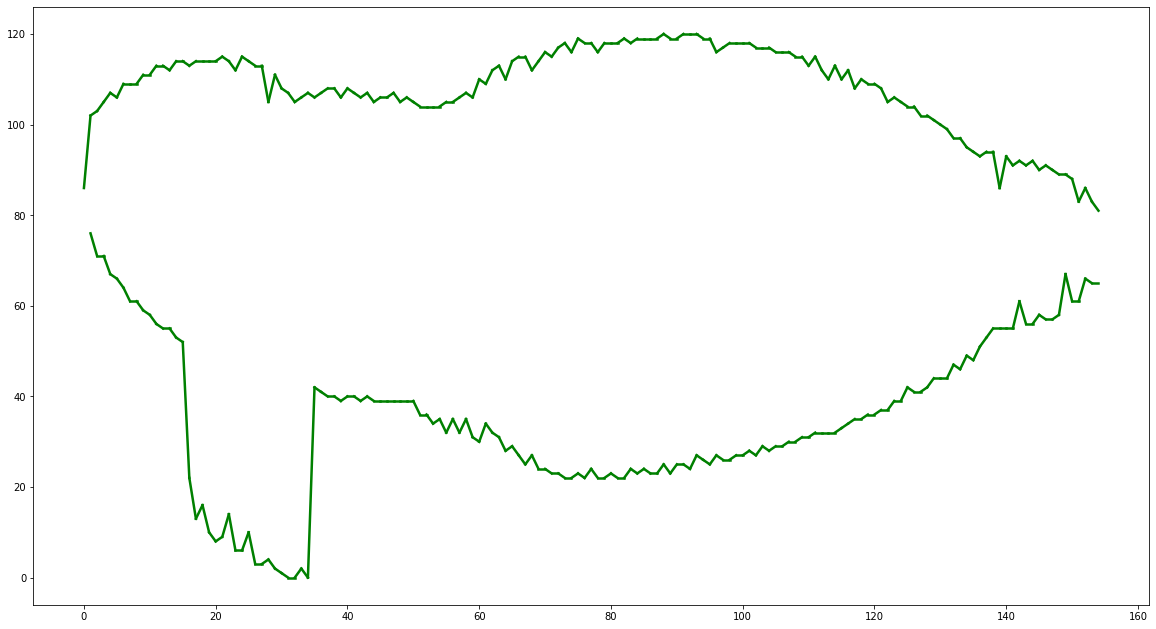

In [26]:
#x_boundaries.append((x_range,lower_bound))
#x_boundaries.append((x_range,upper_bound))
plt.figure(figsize = (20,11))
for i in range(len(x_boundaries)-3):
    x_range_1,lower_bound_1 = x_boundaries[i]
    x_range_1,upper_bound_1 = x_boundaries[i+1]
    x_range_2,lower_bound_2 = x_boundaries[i+2]
    x_range_2,upper_bound_2 = x_boundaries[i+3]
    
    plt.plot((x_range_1,x_range_2),(lower_bound_1,lower_bound_2),c= 'green',linewidth=2.5)
    
    

In [13]:
x_boundaries[i]


array([153,  83])

In [39]:
duplicate_index = []
for i in range(len(y_booundaries)):
    mask = (x_boundaries == y_booundaries[i]).sum(axis=1)==2 #2 => both y and x are equal
    if mask.sum()==0:
        duplicate_index.append(i)
    
print(len(y_booundaries[duplicate_index]),len(y_booundaries))


133 240


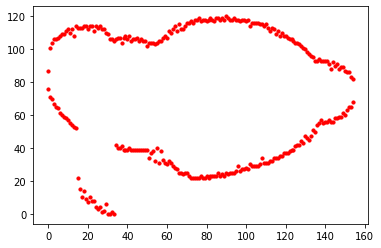

In [88]:
y_booundaries_no_dup = y_booundaries[duplicate_index]
plt.scatter((x_boundaries[:,0]),(x_boundaries[:,1]),c='r',s = 10)
#plt.scatter(y_booundaries_no_dup[:,0],y_booundaries_no_dup[:,1],c='green',s=5)

In [96]:
x_boundaries[0,:],x_boundaries[1,:]


(array([ 0, 87]), array([ 0, 76]))

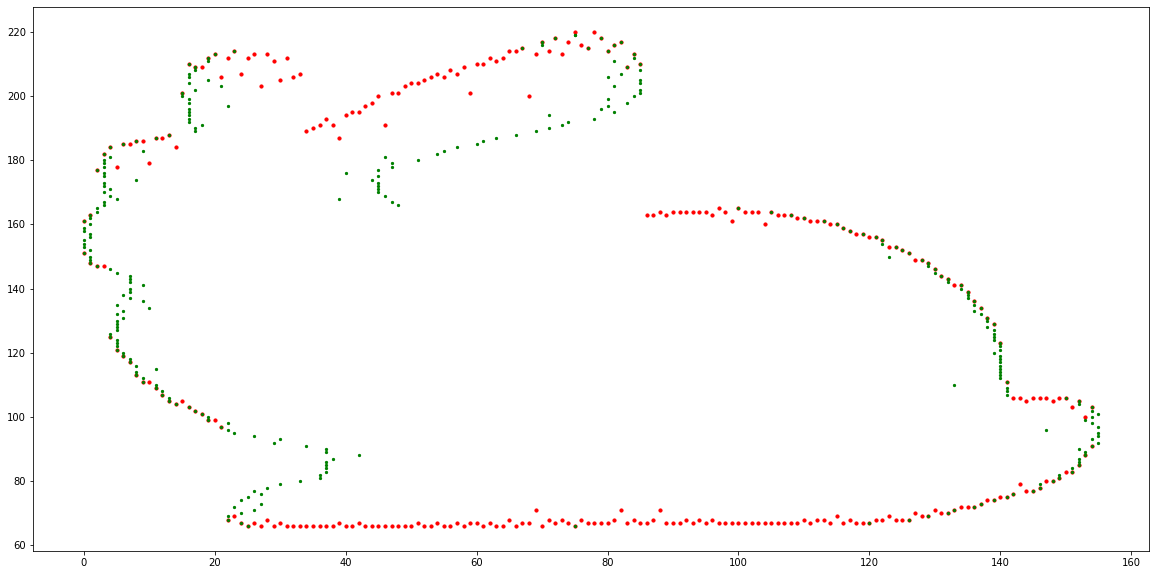

In [53]:
rescaled  = list_points.copy()

rescaled[:,0] += abs(list_points[:,0].min())
rescaled[:,1] += abs(list_points[:,1].min())
rescaled[:,2] += abs(list_points[:,2].min())

rescaled*=1000
rescaled = rescaled.astype(int)

x0,xf = rescaled[:,0].min(),rescaled[:,0].max()
y0,yf = rescaled[:,1].min(),rescaled[:,1].max()


#plt.scatter(rescaled[:,0],rescaled[:,2])

plt.figure(figsize = (20,10))


points = []

for x_range in range(0,xf):
   
    y_mask = rescaled[:,0] == x_range
    
    lower_bound, upper_bound = rescaled[y_mask,1].max(),rescaled[y_mask,1].min()  
    points.append((x_range,lower_bound))
    points.append((x_range,upper_bound))
    
    plt.scatter((x_range,x_range),(lower_bound,upper_bound),c='r',s = 10)
    

for y_range in range(0,yf):
   
    x_mask = rescaled[:,1] == y_range
    
    if x_mask.sum() == 0: continue
    
    lower_bound, upper_bound = rescaled[x_mask,0].max(),rescaled[x_mask,0].min()  

    points.append((lower_bound, y_range ))
    points.append((lower_bound, y_range ))
    
    
    plt.scatter((lower_bound,upper_bound),(y_range,y_range),c='green',s=5)
    
    
    
    

In [71]:
len(points)

464

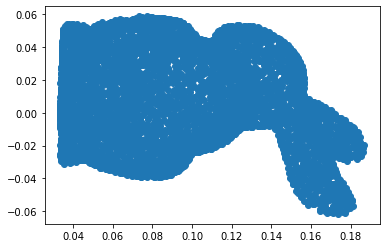

In [43]:
plt.scatter(list_points[:,1],list_points[:,2])

/home/pixlog/install/enviroments/py39/lib/python3.9/site-packages/shapely/ops.py:42: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  source = iter(source)
/home/pixlog/install/enviroments/py39/lib/python3.9/site-packages/alphashape/optimizealpha.py:41: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return all([polygon.intersects(point) for point in points])
/home/pixlog/install/enviroments/py39/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


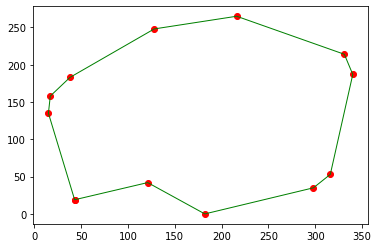

In [162]:
import alphashape
import matplotlib.pyplot as plt
from descartes import PolygonPatch

points = [(17, 158),(15, 135),(38, 183),(43, 19),(93, 88),(96, 140),(149, 163),(128, 248),(216, 265),(248, 210),(223, 167),(256, 151),(331, 214),(340, 187),(316, 53),(298, 35),(182, 0),(121, 42)]

alpha = 0.95 * alphashape.optimizealpha(points)
hull = alphashape.alphashape(points, alpha)
hull_pts = hull.exterior.coords.xy

fig, ax = plt.subplots()
ax.scatter(hull_pts[0], hull_pts[1], color='red')
ax.add_patch(PolygonPatch(hull, fill=False, color='green'))

In [59]:
pts = points
len(points)

309

In [163]:
pts = np.array(pts)

plt.scatter(x_boundaries[:,0],x_boundaries[:,1])

POINTS = [(x, y) for x,y in zip(x_boundaries[:,0],x_boundaries[:,1])]

   


NameError: name 'pts' is not defined

In [164]:



alpha = 0.9 * alphashape.optimizealpha(POINTS)
hull = alphashape.alphashape(POINTS, alpha)
hull_pts = hull.exterior.coords.xy

fig, ax = plt.subplots()
ax.scatter(hull_pts[0], hull_pts[1], color='red')
ax.add_patch(PolygonPatch(hull, fill=False, color='green'))

NameError: name 'POINTS' is not defined

In [48]:
lower_bound

79

In [31]:
points

[(0.15566301931381463, 0.0077868957299813),
 (0.13026220391406312, 0.010618575486794696),
 (0.13124450580122032, 0.010401863990320018),
 (0.131038668222209, 0.016091266588740827),
 (0.1546501288655607, 0.0010429853425807944),
 (0.13129073450962075, 0.0058277365057052355),
 (0.13072119031443935, 0.012011874735450387),
 (0.03886796622220007, -0.008580749248302398),
 (0.1561822817838822, 0.01362845642690504),
 (0.1306839114149896, 0.009174509855657879),
 (0.13151251617652565, 0.013082603463656252),
 (0.13161657588284748, 0.0114881198411222),
 (0.13136807142117235, 0.01602070535790049),
 (0.13150276656334003, 0.008642963057351218),
 (0.1316201257891799, 0.01420010839528928),
 (0.1310419397208578, 0.007151723588271684),
 (0.1264905944104803, 0.008241980973689451),
 (0.1262729788421008, 0.010705118550254047),
 (0.12590555117703361, 0.013527166755393675),
 (0.12561190297451746, 0.007906794741686455)]

In [30]:
alpha = 0.95 * alphashape.optimizealpha(points[:20])
hull = alphashape.alphashape(points[:20], alpha)
hull_pts = hull.exterior.coords.xy

fig, ax = plt.subplots()
ax.scatter(hull_pts[0], hull_pts[1], color='red')
ax.add_patch(PolygonPatch(hull, fill=False, color='green'))

KeyboardInterrupt: 

In [ ]:
'''
Copyright (C) 2018  Andre Lester Kruger
ConcaveHull.py is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 2 of the License, or
(at your option) any later version.
ConcaveHull.py is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.
You should have received a copy of the GNU General Public License
along with ConcaveHull.py.  If not, see <http://www.gnu.org/licenses/>.
'''

import bisect
from collections import OrderedDict
import math
#import numpy as np
import matplotlib.tri as tri
from shapely.geometry import LineString
from shapely.geometry import Polygon
from shapely.ops import linemerge


class ConcaveHull:
    
    def __init__(self):
        self.triangles = {}
        self.crs = {}
        
    
    def loadpoints(self, points):
        #self.points = np.array(points)
        self.points = points
        
        
    def edge(self, key, triangle):
        '''Calculate the length of the triangle's outside edge
        and returns the [length, key]'''
        pos = triangle[1].index(-1)
        if pos==0:
            x1, y1 = self.points[triangle[0][0]]
            x2, y2 = self.points[triangle[0][1]]
        elif pos==1:
            x1, y1 = self.points[triangle[0][1]]
            x2, y2 = self.points[triangle[0][2]]
        elif pos==2:
            x1, y1 = self.points[triangle[0][0]]
            x2, y2 = self.points[triangle[0][2]]
        length = ((x1-x2)**2+(y1-y2)**2)**0.5
        rec = [length, key]
        return rec
        
    
    def triangulate(self):
        
        if len(self.points) < 2:
            raise Exception('CountError: You need at least 3 points to Triangulate')
        
        temp = list(zip(*self.points))
        x, y = list(temp[0]), list(temp[1])
        del(temp)
        
        triang = tri.Triangulation(x, y)
        
        self.triangles = {}
        
        for i, triangle in enumerate(triang.triangles):
            self.triangles[i] = [list(triangle), list(triang.neighbors[i])]
        

    def calculatehull(self, tol=50):
        
        self.tol = tol
        
        if len(self.triangles) == 0:
            self.triangulate()
        
        # All triangles with one boundary longer than the tolerance (self.tol)
        # is added to a sorted deletion list.
        # The list is kept sorted from according to the boundary edge's length
        # using bisect        
        deletion = []    
        self.boundary_vertices = set()
        for i, triangle in self.triangles.items():
            if -1 in triangle[1]:
                for pos, neigh in enumerate(triangle[1]):
                    if neigh == -1:
                        if pos == 0:
                            self.boundary_vertices.add(triangle[0][0])
                            self.boundary_vertices.add(triangle[0][1])
                        elif pos == 1:
                            self.boundary_vertices.add(triangle[0][1])
                            self.boundary_vertices.add(triangle[0][2])
                        elif pos == 2:
                            self.boundary_vertices.add(triangle[0][0])
                            self.boundary_vertices.add(triangle[0][2])
            if -1 in triangle[1] and triangle[1].count(-1) == 1:
                rec = self.edge(i, triangle)
                if rec[0] > self.tol and triangle[1].count(-1) == 1:
                    bisect.insort(deletion, rec)
                    
        while len(deletion) != 0:
            # The triangles with the longest boundary edges will be 
            # deleted first
            item = deletion.pop()
            ref = item[1]
            flag = 0
            
            # Triangle will not be deleted if it already has two boundary edges            
            if self.triangles[ref][1].count(-1) > 1:
                continue
                
            # Triangle will not be deleted if the inside node which is not
            # on this triangle's boundary is already on the boundary of 
            # another triangle
            adjust = {0: 2, 1: 0, 2: 1}            
            for i, neigh in enumerate(self.triangles[ref][1]):
                j = adjust[i]
                if neigh == -1 and self.triangles[ref][0][j] in self.boundary_vertices:
                    flag = 1
                    break
            if flag == 1:
                continue
           
            for i, neigh in enumerate(self.triangles[ref][1]):
                if neigh == -1:
                    continue
                pos = self.triangles[neigh][1].index(ref)
                self.triangles[neigh][1][pos] = -1
                rec = self.edge(neigh, self.triangles[neigh])
                if rec[0] > self.tol and self.triangles[rec[1]][1].count(-1) == 1:
                    bisect.insort(deletion, rec)
                    
            for pt in self.triangles[ref][0]:
                self.boundary_vertices.add(pt)
                                        
            del self.triangles[ref]
            
        self.polygon()
            
                    

    def polygon(self):
        
        edgelines = []
        for i, triangle in self.triangles.items():
            if -1 in triangle[1]:
                for pos, value in enumerate(triangle[1]):
                    if value == -1:
                        if pos==0:
                            x1, y1 = self.points[triangle[0][0]]
                            x2, y2 = self.points[triangle[0][1]]
                        elif pos==1:
                            x1, y1 = self.points[triangle[0][1]]
                            x2, y2 = self.points[triangle[0][2]]
                        elif pos==2:
                            x1, y1 = self.points[triangle[0][0]]
                            x2, y2 = self.points[triangle[0][2]]
                        line = LineString([(x1, y1), (x2, y2)])
                        edgelines.append(line)

        bound = linemerge(edgelines)
    
        self.boundary = Polygon(bound.coords)
        